# Visualises results from stlearn LR-CCI pipeline on the SVZ SeqFish+ data.

INPUT: 
 * /Volumes/GML001-Q1851/Brad/seqFISH/svz_LR-CCI.h5ad
 
OUTPUT: 
 * plots/X4_seqFISH/*
 
## Environment Setup

In [5]:
# TODO change this to your directory
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stlearn_manuscript/mainfigCCI_newCCISupps/'

import os
os.chdir(work_dir)

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
from PIL import Image
import matplotlib.pyplot as plt

import scripts.utils.visualisation.helpers as vhs

import stlearn as st

data_dir = '/Volumes/GML001-Q1851/Brad/seqFISH/'
out_dir = data_dir
out_plots = 'plots/X4_seqFISH/'

## Loading the data

In [7]:
data = sc.read_h5ad(data_dir+'svz_LR-CCI.h5ad')

data.uns['lr_summary'].index = [lr.replace('_', '-')
                                for lr in data.uns['lr_summary'].index]

## Visualising LR analysis results

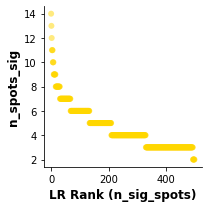

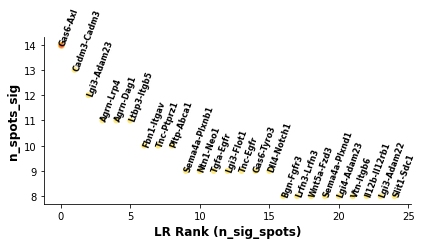

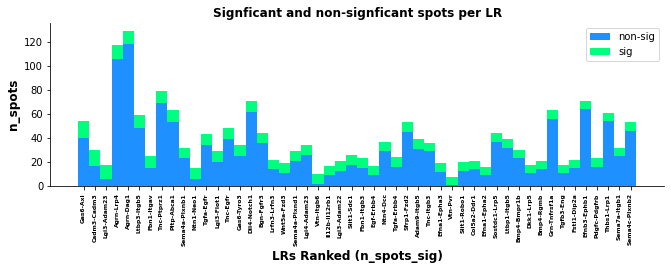

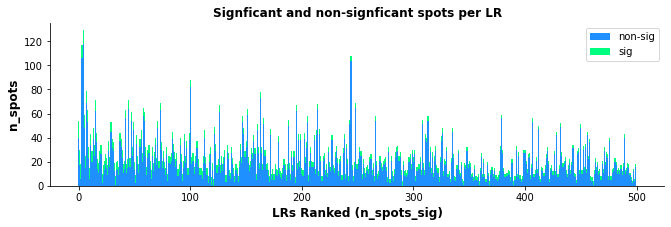

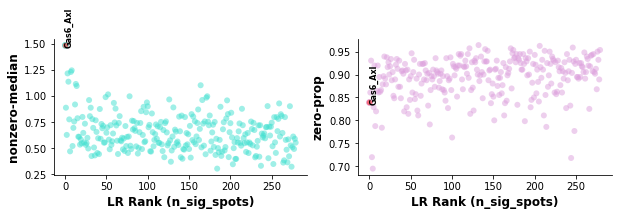

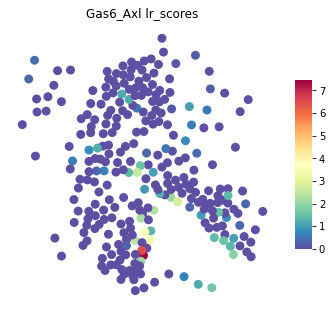

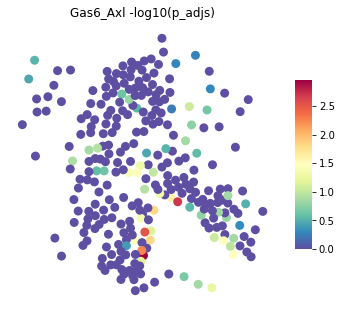

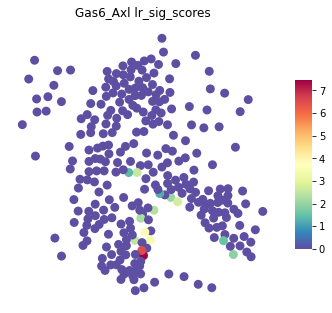

In [8]:
# Showing the rankings of the LR from a global and local perspective.
# Ranking based on number of significant hotspots.
st.pl.lr_summary(data, n_top=500, figsize=(3,3), show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'global_lr-rank.pdf', 300)
st.pl.lr_summary(data, n_top=25, figsize=(6,3.5), highlight_lrs=['Gas6-Axl'],
                 show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'local_lr-rank.pdf', 300)

st.pl.lr_n_spots(data, n_top=50, figsize=(11, 3),
                    max_text=100)
st.pl.lr_n_spots(data, n_top=500, figsize=(11, 3),
                    max_text=100)

data.uns['lr_summary'].index = [lr.replace('-', '_')
                                for lr in data.uns['lr_summary'].index]
st.pl.lr_diagnostics(data, figsize=(10,2.5), highlight_lrs=['Gas6_Axl'])

""" Diagnostic look really, really good. 
"""

#### Looking at the top LR pair ####
best_lr = data.uns['lr_summary'].index.values[0] # Just choosing one of the top from lr_summary

s=80
stats = ['lr_scores', '-log10(p_adjs)', 'lr_sig_scores']
for stat in stats:
    fig, axes = plt.subplots(figsize=(5,5))
    st.pl.lr_result_plot(data, use_result=stat, use_lr=best_lr,
                         show_color_bar=True, ax=axes, size=s)
    axes.set_title(f'{best_lr} {stat}')
    vhs.dealWithPlot(True, True, True, out_plots, f'{best_lr}_{stat}.pdf', 300)

## Visualising CCI analysis results

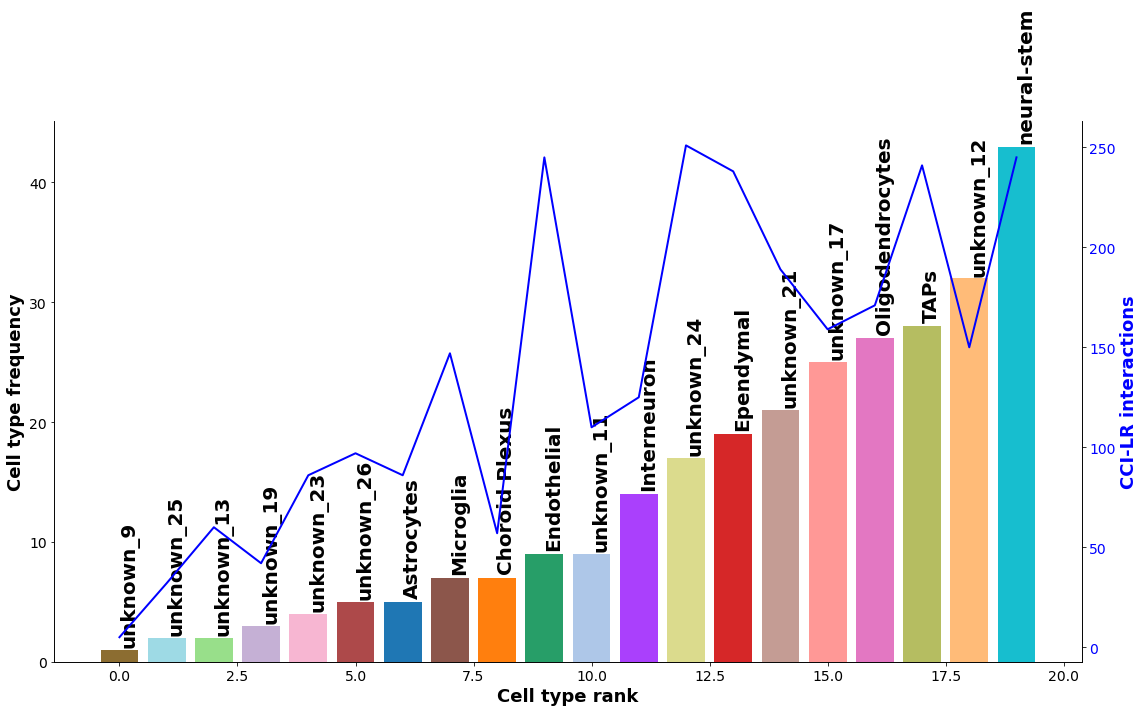

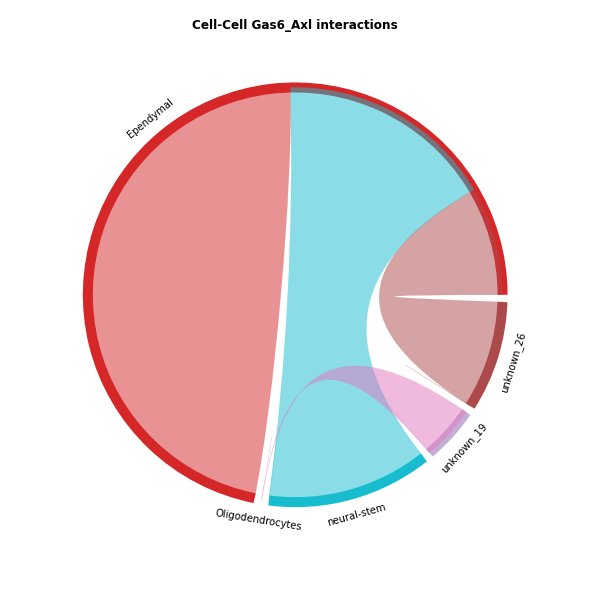

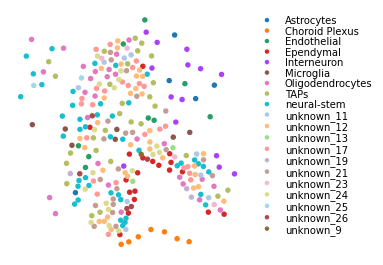

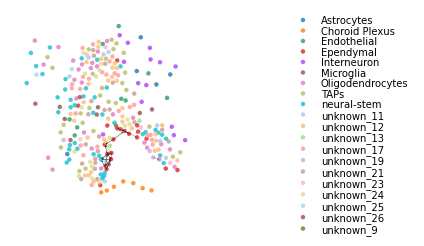

In [9]:
st.pl.cci_check(data, 'cell_type')

##### Chord plots ####
for lr in data.uns['lr_summary'].index.values[0:1]:
    st.pl.lr_chord_plot(data, 'cell_type', lr, show=False, min_ints=0)
    vhs.dealWithPlot(True, True, True, out_plots, f'{lr}_chord.pdf', 300)

#### Spatial interaction plots #####
library_id = "seqFISH+"
data.uns['spatial'][library_id]['scalefactors']['tissue_lowres_scalef'] = 60

best_lr = data.uns['lr_summary'].index.values[0]

#### Normal plot ####
st.pl.cluster_plot(data, use_label='cell_type', size=30)
vhs.dealWithPlot(True, True, True, out_plots, f'cell_types.pdf', 300)

### This will plot with simple black arrows ####
st.pl.lr_plot(data, best_lr, outer_size_prop=1, outer_mode=None,
              pt_scale=80, use_label='cell_type', show_arrows=True,
              show_image=True, sig_spots=False, sig_cci=True,
                 arrow_head_width=10,
                 arrow_width=2, cell_alpha=.8
                 )
vhs.dealWithPlot(True, True, True, out_plots, f'{best_lr}_arrows.pdf', 300)